## Machine Learning Model
In this project, we delve into the realm of environmental data, specifically focusing on air quality, using a dataset sourced from the UCI Machine Learning Repository. Our objective is to construct a robust machine learning model to predict levels of carbon monoxide (CO), a pivotal air pollutant with substantial implications for public health. As urbanization and industrial activities continue to rise, understanding and forecasting air quality becomes an important issue to talk about. By employing advanced machine learning techniques, we aim understand patterns within the dataset, shedding light on various meteorological and environmental factors that influence CO concentrations in air. This predictive model holds the potential to aid regulatory bodies, environmental agencies, and policymakers in proactively addressing air pollution challenges. Throughout the project, we will engage in thorough exploratory data analysis, feature engineering, and model tuning to develop an accurate and insightful tool for predicting CO levels. This will contribute to broader initiatives aimed at creating healthier and more sustainable living environments.

According to the data information, the raw dataset contains 9358 observatios and 15 attributes. The missing values are tagged with -200 value.

Link to the data source: https://archive.ics.uci.edu/dataset/360/air+quality

#### Dataset information:

Date:	(DD/MM/YYYY)

Time:	(HH.MM.SS)

CO(GT): True hourly averaged concentration CO in mg/m^3  (reference analyzer)

PT08.S1(CO): Hourly averaged sensor response (nominally  CO targeted)

NMHC(GT): True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)

C6H6(GT): True hourly averaged Benzene concentration  in microg/m^3 (reference analyzer)

PT08.S2(NMHC): Hourly averaged sensor response (nominally NMHC targeted)

NOx(GT): True hourly averaged NOx concentration  in ppb (reference analyzer)

PT08.S3(NOx): Hourly averaged sensor response (nominally NOx targeted)

NO2(GT): True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)

PT08.S4(NO2): Hourly averaged sensor response (nominally NO2 targeted)

PT08.S5 (O3): Hourly averaged sensor response (nominally O3 targeted)

T: Temperature in Â°C

RH: Relative Humidity(%)

AH: Absolute Humidity

Out of all the above features, CO(GT) is the traget feature and rest are the explanatory features.

In [66]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
#Reading the data
data = pd.read_csv('AirQuality_Data.csv')

In [68]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [69]:
data.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [70]:
#Dropping unnecessary columns
data.drop(['Date', 'Time', 'Unnamed: 15', 'Unnamed: 16'], axis=1, inplace=True)

In [71]:
data.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


array([[<Axes: title={'center': 'CO(GT)'}>,
        <Axes: title={'center': 'PT08.S1(CO)'}>,
        <Axes: title={'center': 'NMHC(GT)'}>,
        <Axes: title={'center': 'C6H6(GT)'}>],
       [<Axes: title={'center': 'PT08.S2(NMHC)'}>,
        <Axes: title={'center': 'NOx(GT)'}>,
        <Axes: title={'center': 'PT08.S3(NOx)'}>,
        <Axes: title={'center': 'NO2(GT)'}>],
       [<Axes: title={'center': 'PT08.S4(NO2)'}>,
        <Axes: title={'center': 'PT08.S5(O3)'}>,
        <Axes: title={'center': 'T'}>, <Axes: title={'center': 'RH'}>],
       [<Axes: title={'center': 'AH'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

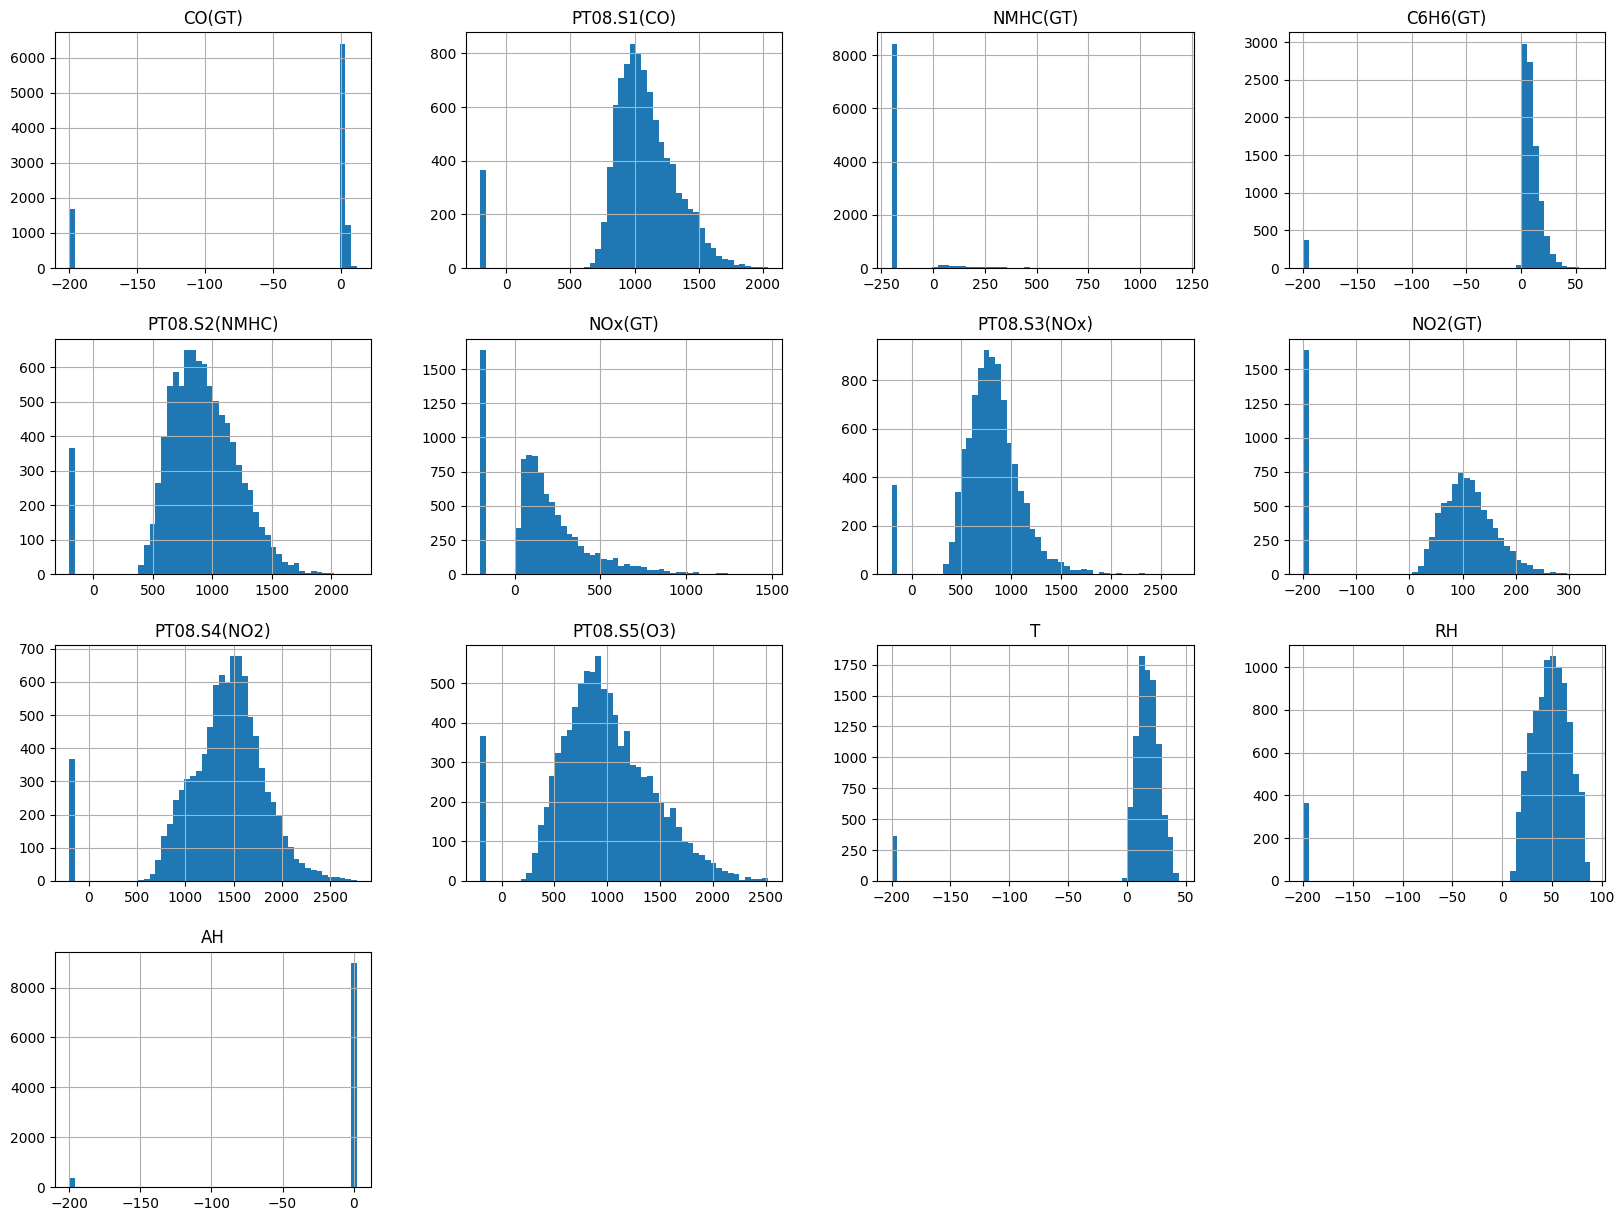

In [72]:
#Visualizing the distribution of each feature of the dataset
data.hist(bins=50, figsize=(20,15))

In [73]:
#Splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=40)

In [76]:
len(train_set)

7576

In [78]:
len(test_set)

1895

In [80]:
#Tagging the missing values with NaN both in train and test set
train_set.replace(-200, np.nan, inplace=True)
test_set.replace(-200, np.nan, inplace=True)

In [82]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7576 entries, 3882 to 7608
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         6166 non-null   float64
 1   PT08.S1(CO)    7205 non-null   float64
 2   NMHC(GT)       747 non-null    float64
 3   C6H6(GT)       7205 non-null   float64
 4   PT08.S2(NMHC)  7205 non-null   float64
 5   NOx(GT)        6185 non-null   float64
 6   PT08.S3(NOx)   7205 non-null   float64
 7   NO2(GT)        6182 non-null   float64
 8   PT08.S4(NO2)   7205 non-null   float64
 9   PT08.S5(O3)    7205 non-null   float64
 10  T              7205 non-null   float64
 11  RH             7205 non-null   float64
 12  AH             7205 non-null   float64
dtypes: float64(13)
memory usage: 828.6 KB


In [83]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1895 entries, 1579 to 7633
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         1508 non-null   float64
 1   PT08.S1(CO)    1786 non-null   float64
 2   NMHC(GT)       167 non-null    float64
 3   C6H6(GT)       1786 non-null   float64
 4   PT08.S2(NMHC)  1786 non-null   float64
 5   NOx(GT)        1533 non-null   float64
 6   PT08.S3(NOx)   1786 non-null   float64
 7   NO2(GT)        1533 non-null   float64
 8   PT08.S4(NO2)   1786 non-null   float64
 9   PT08.S5(O3)    1786 non-null   float64
 10  T              1786 non-null   float64
 11  RH             1786 non-null   float64
 12  AH             1786 non-null   float64
dtypes: float64(13)
memory usage: 207.3 KB


So we can see some missing values in the train and test set.

In [85]:
#Imputing the missing values of the train_set with the median
imputed_train_set = train_set.fillna(train_set.median())

In [86]:
imputed_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7576 entries, 3882 to 7608
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         7576 non-null   float64
 1   PT08.S1(CO)    7576 non-null   float64
 2   NMHC(GT)       7576 non-null   float64
 3   C6H6(GT)       7576 non-null   float64
 4   PT08.S2(NMHC)  7576 non-null   float64
 5   NOx(GT)        7576 non-null   float64
 6   PT08.S3(NOx)   7576 non-null   float64
 7   NO2(GT)        7576 non-null   float64
 8   PT08.S4(NO2)   7576 non-null   float64
 9   PT08.S5(O3)    7576 non-null   float64
 10  T              7576 non-null   float64
 11  RH             7576 non-null   float64
 12  AH             7576 non-null   float64
dtypes: float64(13)
memory usage: 828.6 KB


In [87]:
#Imputing the missing values of the train_set with the median
imputed_test_set = test_set.fillna(test_set.median())

In [88]:
imputed_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1895 entries, 1579 to 7633
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         1895 non-null   float64
 1   PT08.S1(CO)    1895 non-null   float64
 2   NMHC(GT)       1895 non-null   float64
 3   C6H6(GT)       1895 non-null   float64
 4   PT08.S2(NMHC)  1895 non-null   float64
 5   NOx(GT)        1895 non-null   float64
 6   PT08.S3(NOx)   1895 non-null   float64
 7   NO2(GT)        1895 non-null   float64
 8   PT08.S4(NO2)   1895 non-null   float64
 9   PT08.S5(O3)    1895 non-null   float64
 10  T              1895 non-null   float64
 11  RH             1895 non-null   float64
 12  AH             1895 non-null   float64
dtypes: float64(13)
memory usage: 207.3 KB


In [90]:
#Descriptive statistics of the train_set
imputed_train_set.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,7576.000000,7576.000000,7576.000000,7576.000000,7576.000000,7576.000000,7576.000000,7576.000000,7576.000000,7576.000000,7576.000000,7576.000000,7576.000000
mean,2.086497,1099.249208,155.246568,9.987658,937.301874,233.833157,834.388464,112.069166,1457.089889,1020.600449,18.271911,49.282973,1.024543
std,1.320253,212.282104,69.675519,7.267070,260.828487,194.008585,251.684465,43.732755,338.557925,390.194002,8.624289,16.837011,0.394187
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,325.000000,2.000000,561.000000,225.000000,-1.400000,9.200000,0.186200
25%,1.200000,942.000000,148.000000,4.600000,743.000000,113.000000,666.000000,85.000000,1247.000000,742.750000,12.100000,36.800000,0.747750
50%,1.800000,1065.000000,148.000000,8.200000,908.000000,179.000000,805.000000,109.000000,1464.000000,964.000000,17.700000,49.500000,0.996400
75%,2.600000,1221.000000,148.000000,13.600000,1105.000000,280.000000,960.000000,132.000000,1659.000000,1254.250000,24.000000,61.600000,1.295000
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.180600


In [189]:
corr_matrix = imputed_train_set.corr()
corr_matrix

,CO(GT),NMHC(GT),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.297930,0.660305,0.548663,0.766081,0.004894,0.044341,0.023453
NMHC(GT),0.297930,1.000000,0.123116,0.264779,0.233205,0.030124,-0.045517,-0.011363
NO2(GT),0.660305,0.123116,1.000000,0.145191,0.632620,-0.169873,-0.077183,-0.292007
PT08.S4(NO2),0.548663,0.264779,0.145191,1.000000,0.593815,0.560790,-0.030224,0.630003
PT08.S5(O3),0.766081,0.233205,0.632620,0.593815,1.000000,-0.025713,0.129392,0.076574
T,0.004894,0.030124,-0.169873,0.560790,-0.025713,1.000000,-0.577073,0.659753
RH,0.044341,-0.045517,-0.077183,-0.030224,0.129392,-0.577073,1.000000,0.166057
AH,0.023453,-0.011363,-0.292007,0.630003,0.076574,0.659753,0.166057,1.000000


In [94]:
##Taking care of multicolinearity in the train_set

# Setting the correlation threshold
correlation_threshold = 0.7

# Creating an empty list to store the features to remove
features_to_remove = []

# Iterating through the correlation matrix except for the target variable, 'CO(GT)'
for i in range(1, len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        # Checking if the correlation between features is above the threshold
        if abs(corr_matrix.iloc[i,j]) > correlation_threshold:
            # Identifying and appending the features with higher correlation to the empty list
            feature_to_remove = corr_matrix.columns[j] if corr_matrix.iloc[i,i] > corr_matrix.iloc[j,j] else corr_matrix.columns[i]
            features_to_remove.append(feature_to_remove)

# Removing the identified features from train_set and test_set
imputed_train_set = imputed_train_set.drop(columns=features_to_remove, axis=1)

In [95]:
imputed_train_set.head()

,CO(GT),NMHC(GT),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
3882,1.2,148.0,44.0,1606.0,670.0,36.2,30.6,1.8105
4431,1.8,148.0,109.0,1506.0,1303.0,24.0,40.8,1.1993
7781,1.1,148.0,91.0,1464.0,964.0,17.7,49.5,0.9964
3028,1.9,148.0,123.0,1552.0,1074.0,26.3,27.3,0.9238
1392,4.3,148.0,133.0,1911.0,1127.0,12.7,70.4,1.0294


In [98]:
#Dropping the same features from the test_set to maintain balance
imputed_test_set.drop(['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)'], axis=1, inplace=True)

In [99]:
imputed_test_set.head()

,CO(GT),NMHC(GT),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
1579,1.7,155.0,87.0,1460.0,815.0,25.5,22.6,0.7288
8642,2.6,155.0,185.0,1284.0,1214.0,7.8,63.4,0.6735
5742,1.6,155.0,65.0,1481.0,1015.0,18.5,69.5,1.4657
7281,1.4,155.0,111.0,1049.0,933.0,7.2,72.3,0.7392
1416,1.9,155.0,111.0,1502.0,649.0,17.8,38.5,0.7763


In [190]:
corr_matrix = imputed_train_set.corr()
corr_matrix

,CO(GT),NMHC(GT),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.297930,0.660305,0.548663,0.766081,0.004894,0.044341,0.023453
NMHC(GT),0.297930,1.000000,0.123116,0.264779,0.233205,0.030124,-0.045517,-0.011363
NO2(GT),0.660305,0.123116,1.000000,0.145191,0.632620,-0.169873,-0.077183,-0.292007
PT08.S4(NO2),0.548663,0.264779,0.145191,1.000000,0.593815,0.560790,-0.030224,0.630003
PT08.S5(O3),0.766081,0.233205,0.632620,0.593815,1.000000,-0.025713,0.129392,0.076574
T,0.004894,0.030124,-0.169873,0.560790,-0.025713,1.000000,-0.577073,0.659753
RH,0.044341,-0.045517,-0.077183,-0.030224,0.129392,-0.577073,1.000000,0.166057
AH,0.023453,-0.011363,-0.292007,0.630003,0.076574,0.659753,0.166057,1.000000


In [103]:
corr_matrix['CO(GT)']

CO(GT)          1.000000
NMHC(GT)        0.297930
NO2(GT)         0.660305
PT08.S4(NO2)    0.548663
PT08.S5(O3)     0.766081
T               0.004894
RH              0.044341
AH              0.023453
Name: CO(GT), dtype: float64

Here we can see that the target variable 'CO(GT)' has strong positive correlation with PT08.S5(O3), NO2(GT), PT08.S4(NO2). Let visualize these relationships one by one.

<Axes: xlabel='PT08.S5(O3)', ylabel='CO(GT)'>

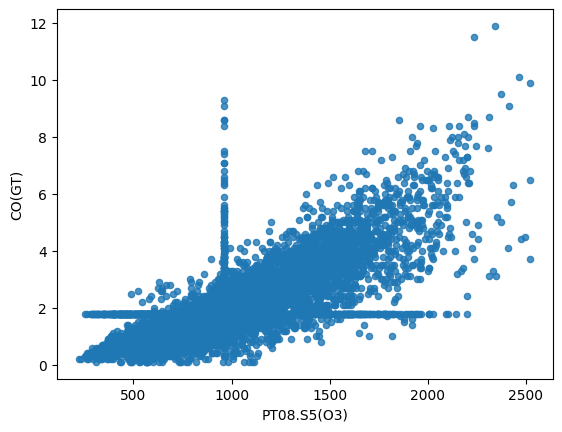

In [105]:
imputed_train_set.plot(kind='scatter', x='PT08.S5(O3)', y='CO(GT)', alpha=0.8)

<Axes: xlabel='NO2(GT)', ylabel='CO(GT)'>

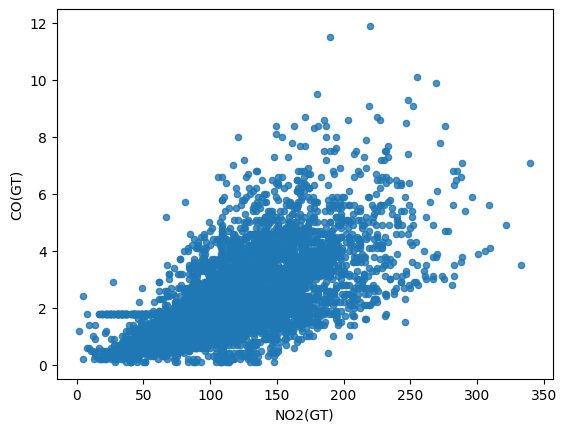

In [106]:
imputed_train_set.plot(kind='scatter', x='NO2(GT)', y='CO(GT)', alpha=0.8)

<Axes: xlabel='PT08.S4(NO2)', ylabel='CO(GT)'>

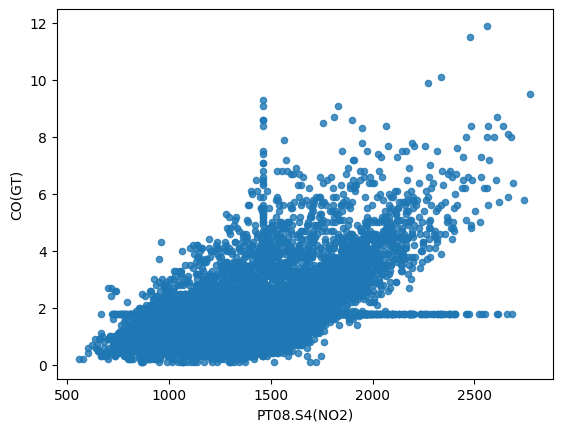

In [107]:
imputed_train_set.plot(kind='scatter', x='PT08.S4(NO2)', y='CO(GT)', alpha=0.8)

From these three graphs we can see that there are some outliers in the train_set. So lets remove these outliers so that there are no bad influences of these outliers on our model.

In [117]:
##Removing outliers from the train_set

from scipy import stats

# Calculating Z-scores for each column in the DataFrame
z_scores = stats.zscore(imputed_train_set)

# Setting a Z-score threshold of 3 standard deviations
threshold = 3

# Identify and remove rows with outliers
outlier_rows = (abs(z_scores) > threshold).any(axis=1)
filtered_train_set = imputed_train_set[~outlier_rows]

# Display the shape of the original and filtered DataFrames
print("Original DataFrame shape:", imputed_train_set.shape)
print("Filtered DataFrame shape:", filtered_train_set.shape)

Original DataFrame shape: (7576, 8)
Filtered DataFrame shape: (7238, 8)


So we can see that we have successfully removed some of the outliers. This can be noticed in the following graphs.

<Axes: xlabel='PT08.S5(O3)', ylabel='CO(GT)'>

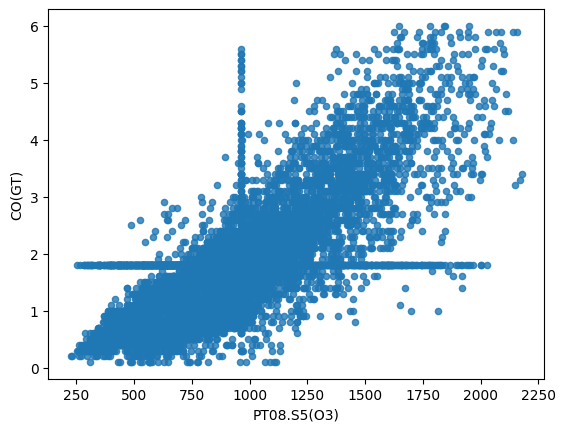

In [118]:
filtered_train_set.plot(kind='scatter', x='PT08.S5(O3)', y='CO(GT)', alpha=0.8)

#### Now from the train and test data we would make x_train, y_train, x_test, and y_test for model training and evaluation.

<Axes: xlabel='NO2(GT)', ylabel='CO(GT)'>

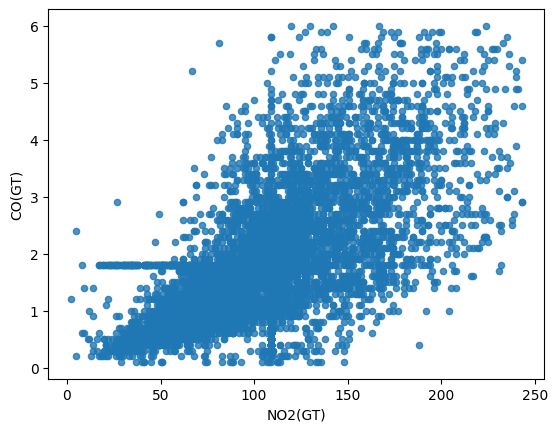

In [119]:
filtered_train_set.plot(kind='scatter', x='NO2(GT)', y='CO(GT)', alpha=0.8)

<Axes: xlabel='PT08.S4(NO2)', ylabel='CO(GT)'>

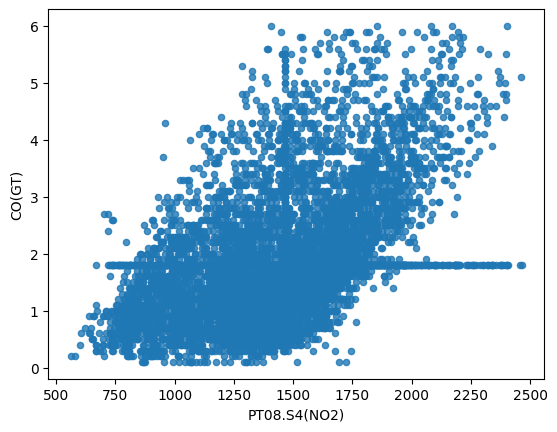

In [120]:
filtered_train_set.plot(kind='scatter', x='PT08.S4(NO2)', y='CO(GT)', alpha=0.8)

In [121]:
x_train = filtered_train_set.drop('CO(GT)', axis=1)

In [122]:
x_train.head()

,NMHC(GT),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
3882,148.0,44.0,1606.0,670.0,36.2,30.6,1.8105
4431,148.0,109.0,1506.0,1303.0,24.0,40.8,1.1993
7781,148.0,91.0,1464.0,964.0,17.7,49.5,0.9964
3028,148.0,123.0,1552.0,1074.0,26.3,27.3,0.9238
1392,148.0,133.0,1911.0,1127.0,12.7,70.4,1.0294


In [123]:
y_train = filtered_train_set['CO(GT)']

In [124]:
y_train.head()

3882    1.2
4431    1.8
7781    1.1
3028    1.9
1392    4.3
Name: CO(GT), dtype: float64

In [125]:
x_test = imputed_test_set.drop('CO(GT)', axis=1)

In [127]:
x_test.head()

,NMHC(GT),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
1579,155.0,87.0,1460.0,815.0,25.5,22.6,0.7288
8642,155.0,185.0,1284.0,1214.0,7.8,63.4,0.6735
5742,155.0,65.0,1481.0,1015.0,18.5,69.5,1.4657
7281,155.0,111.0,1049.0,933.0,7.2,72.3,0.7392
1416,155.0,111.0,1502.0,649.0,17.8,38.5,0.7763


In [128]:
y_test = imputed_test_set['CO(GT)']

In [129]:
y_test.head()

1579    1.7
8642    2.6
5742    1.6
7281    1.4
1416    1.9
Name: CO(GT), dtype: float64

#### So now we have the cleaned, feature engineered data to work with.

#### Now we would fit differnent machine learning models on the training data(x_train and y_train) and evaluate the model with test_data(x_test and y_test) to check which model fits the best on our training data and does the most efficient prediction on the test data.

#### We would train the models with cross-validation and hyperparameter tuning.

#### Ridge Regression

In [135]:
from sklearn.model_selection import GridSearchCV

In [136]:
from sklearn.linear_model import Ridge
model = Ridge(random_state=40)

parameters = {'alpha': [0.01, 0.1, 1, 10, 100]}
GS = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=5)

GS.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(random_state=40),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [137]:
GS.best_params_

{'alpha': 1}

In [138]:
model = Ridge(alpha = 1, random_state = 40)
model.fit(x_train, y_train)

Ridge(alpha=1, random_state=40)

In [139]:
y_pred = model.predict(x_test)
y_pred

array([1.61666419, 2.95406578, 1.47630119, ..., 0.81025718, 0.92197886,
       2.55128331])

In [140]:
mse = mean_squared_error(y_test, y_pred)
print('MSE of Ridge Regression:', mse)

MSE of Ridge Regression: 0.5285137051913552


#### Lasso Regression

In [149]:
from sklearn.linear_model import Lasso
model = Lasso(random_state=40)

parameters = {'alpha': [0.01, 0.1, 1, 10, 100]}

GS = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=5)
GS.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(random_state=40),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [150]:
GS.best_params_

{'alpha': 0.01}

In [151]:
model = Lasso(alpha=0.01, random_state=40)
model.fit(x_train, y_train)

Lasso(alpha=0.01, random_state=40)

In [152]:
y_pred = model.predict(x_test)
y_pred

array([1.55009258, 2.93839868, 1.49083764, ..., 0.73959116, 0.89684788,
       2.58630349])

In [153]:
mse = mean_squared_error(y_test, y_pred)
print('MSE of Lasso Regression', mse)

MSE of Lasso Regression 0.5285927884497124


#### Decision Tree Regressor

In [161]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=40)

parameters = {
    'max_depth': [3, 6, 9],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2, 4],
}

GS = GridSearchCV(model, param_grid=parameters, scoring='neg_mean_squared_error', cv=5)
GS.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=40),
             param_grid={'max_depth': [3, 6, 9], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 8]},
             scoring='neg_mean_squared_error')

In [162]:
GS.best_params_

{'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [163]:
model = DecisionTreeRegressor(max_depth = 9, min_samples_leaf = 4, min_samples_split = 2, random_state=40)
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=9, min_samples_leaf=4, random_state=40)

In [164]:
y_pred = model.predict(x_test)
y_pred

array([1.70454545, 2.676     , 1.47297297, ..., 0.71111111, 1.16730769,
       2.18409091])

In [165]:
mse = mean_squared_error(y_test, y_pred)
print('MSE of Decison Tree Regressor :', mse)

MSE of Decison Tree Regressor : 0.5496041272363285


#### Random Forest Regressor

In [166]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=40)

parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

GS = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=5)
GS.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=40),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [167]:
GS.best_params_

{'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

In [169]:
model = RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200)
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=200)

In [170]:
y_pred = model.predict(x_test)
y_pred

array([1.75321411, 2.5418814 , 1.60753979, ..., 0.74383875, 1.11610059,
       2.80416627])

In [171]:
mse = mean_squared_error(y_test, y_pred)
print('MSE of Random Forest Regressor :', mse)

MSE of Random Forest Regressor : 0.4023753250773265


#### Gradient Boosting Regressor  

In [172]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=40)

parameters = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    #'max_features': ['auto', 'sqrt', 'log2'],
    #'subsample': [0.8, 0.9, 1.0]
}

GS = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=5)
GS.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=40),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 9], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [173]:
GS.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 200}

In [174]:
model = GradientBoostingRegressor(learning_rate=0.1, max_depth=6, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=40)
model.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=6, min_samples_leaf=4, min_samples_split=10,
                          n_estimators=200, random_state=40)

In [175]:
y_pred = model.predict(x_test)
y_pred

array([1.89133325, 2.68220714, 1.40828004, ..., 0.82094316, 1.3530676 ,
       2.94893122])

In [176]:
mse = mean_squared_error(y_test, y_pred)
print('MSE of Gradient Boosting Regressor :', mse)

MSE of Gradient Boosting Regressor : 0.4166912666654901


Out of all the above models we can see the the MSE is least for the Random Forest Regressor model. So we would select Random Forest Regressor as out final Model.

#### Creating a Pipeline

In [184]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),  #scaling the values
    ('model', RandomForestRegressor(max_depth=20, min_samples_leaf=2,
                                    min_samples_split=5, n_estimators=200,
                                    random_state=40))  #the parametric values are being chosen by hyper-parameter tuning
])

my_pipeline.fit(x_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('model',
                 RandomForestRegressor(max_depth=20, min_samples_leaf=2,
                                       min_samples_split=5, n_estimators=200,
                                       random_state=40))])

In [185]:
y_pred = my_pipeline.predict(x_test)
y_pred

array([1.76763915, 2.53016537, 1.56579836, ..., 0.73189021, 1.13858146,
       2.69001488])

#### This is the final prediction of our model. The model is now ready for deployment.

In conclusion, this project has successfully developed a machine learning model to predict carbon monoxide (CO) levels in the air. Through comprehensive analysis and model refinement, we achieved an accurate predictor, providing valuable insights into the dynamics of air pollution. The model's potential impact extends to environmental management and public health initiatives. By leveraging predictive capabilities, we contribute to a data-driven approach in addressing air quality challenges. This project underscores the significance of machine learning in understanding and mitigating the impact of air pollutants, promoting healthier and sustainable living environments.